# Machine Learning in the Real World

#               1. Data preparation and cleaning (Pre Processing )

### Import Python Libraries

In [380]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn 
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier

%matplotlib inline

### Data Loading

In [400]:
train_raw_data = pd.read_table('train.tsv')
test_raw_data = pd.read_table('test.tsv')
train_data = train_raw_data.copy()
test_data = test_raw_data.copy()

### Replace missing values to NaN

In [401]:
# missing values are appearing as '?'
# replace them with np.nan

for variable in train_data.columns:
    train_data[variable] = train_data[variable].replace('?', np.nan)

for variable in test_data.columns:
    test_data[variable] = test_data[variable].replace('?', np.nan)

## Type Conversion

In [125]:
train_data[:].dtypes

url                                object
urlid                               int64
boilerplate                        object
alchemy_category                   object
alchemy_category_score             object
avglinksize                       float64
commonlinkratio_1                 float64
commonlinkratio_2                 float64
commonlinkratio_3                 float64
commonlinkratio_4                 float64
compression_ratio                 float64
embed_ratio                       float64
framebased                          int64
frameTagRatio                     float64
hasDomainLink                       int64
html_ratio                        float64
image_ratio                       float64
is_news                            object
lengthyLinkDomain                   int64
linkwordscore                       int64
news_front_page                    object
non_markup_alphanum_characters      int64
numberOfLinks                       int64
numwords_in_url                   

### Specifying Data Types

In [217]:
irrelevant_variables = ["url", "urlid"] # lengthyLinkDomain?
string_variables = ["boilerplate"]
numeric_variables = ["alchemy_category_score", "avglinksize", "commonlinkratio_1", "commonlinkratio_2", "commonlinkratio_3", "commonlinkratio_4", "compression_ratio", "embed_ratio", "frameTagRatio", "linkwordscore", "non_markup_alphanum_characters", "numberOfLinks", "numwords_in_url", "parametrizedLinkRatio", "spelling_errors_ratio", "html_ratio", "image_ratio"]
categorical_variables = ["alchemy_category"]
binary_variables = ["framebased", "hasDomainLink", "is_news", "lengthyLinkDomain", "news_front_page"]

### Numeric Variables to Float

In [402]:
for variable in numeric_variables:
    if (train_data[variable].dtype != np.float64 and train_data[variable].dtype != np.int64):
        train_data[variable] = train_data[variable].astype(np.float)
    if (test_data[variable].dtype != np.float64 and test_data[variable].dtype != np.int64):
        test_data[variable] = test_data[variable].astype(np.float)
    
train_data[numeric_variables].dtypes

alchemy_category_score            float64
avglinksize                       float64
commonlinkratio_1                 float64
commonlinkratio_2                 float64
commonlinkratio_3                 float64
commonlinkratio_4                 float64
compression_ratio                 float64
embed_ratio                       float64
frameTagRatio                     float64
linkwordscore                       int64
non_markup_alphanum_characters      int64
numberOfLinks                       int64
numwords_in_url                     int64
parametrizedLinkRatio             float64
spelling_errors_ratio             float64
html_ratio                        float64
image_ratio                       float64
dtype: object

### Binary Variables to String

In [186]:
# for variable in binary_variables:
#     train_data[variable] = train_data[variable].astype(str)

# train_data[binary_variables].dtypes

framebased            int64
hasDomainLink         int64
is_news              object
lengthyLinkDomain     int64
news_front_page      object
dtype: object

### Binarize class label

In [17]:
# train_data['class'] = train_data['class'].map(lambda x : '0' if x == '<=50K' else '1')
# test_data['class'] = test_data['class'].map(lambda x : '0' if x == '<=50K' else '1')

## Missing Data Imputation

In [403]:
missing_varibales = ['alchemy_category', 'alchemy_category_score', 'news_front_page', 'is_news']
np.sum(train_data[missing_varibales].isnull())

alchemy_category          2342
alchemy_category_score    2342
news_front_page           1248
is_news                   2843
dtype: int64

In [404]:
train_data['alchemy_category'] = train_data['alchemy_category'].fillna('unknown')
train_data['alchemy_category_score'].fillna(train_data['alchemy_category_score'].mean(), inplace=True)
np.sum(train_data[missing_varibales].isnull())

alchemy_category             0
alchemy_category_score       0
news_front_page           1248
is_news                   2843
dtype: int64

In [405]:
for variable in ['is_news', 'news_front_page']:
    train_data[variable] = train_data[variable].astype(float)

train_data.ix[train_data.news_front_page == 1, 'is_news'] = 1 #if it front page news it is news
train_data['is_news'].fillna(train_data['is_news'].mean(), inplace=True)
train_data['news_front_page'].fillna(train_data['news_front_page'].mean(), inplace=True)
np.sum(train_data[missing_varibales].isnull())

alchemy_category          0
alchemy_category_score    0
news_front_page           0
is_news                   0
dtype: int64

### categorical variables to dummy variables

In [373]:
df_alchemy_category = pd.get_dummies(train_data['alchemy_category'])

# 2. Data Exploration

In [261]:
train_data.describe()

,urlid,alchemy_category_score,avglinksize,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,compression_ratio,embed_ratio,framebased,...,is_news,lengthyLinkDomain,linkwordscore,news_front_page,non_markup_alphanum_characters,numberOfLinks,numwords_in_url,parametrizedLinkRatio,spelling_errors_ratio,label
count,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.0,...,7395.0,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000
mean,5305.704665,0.603334,2.761823,0.468230,0.214080,0.092062,0.049262,2.255103,-0.103750,0.0,...,1.0,0.660311,30.077079,0.047828,5716.598242,178.754564,4.960649,0.172864,0.101221,0.513320
std,3048.384114,0.175952,8.619793,0.203133,0.146743,0.095978,0.072629,5.704313,0.306545,0.0,...,0.0,0.473636,20.393101,0.194577,8875.432430,179.466198,3.233111,0.183286,0.079231,0.499856
min,1.000000,0.070833,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.0,...,1.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2688.500000,0.538758,1.602062,0.340370,0.105263,0.022222,0.000000,0.442616,0.000000,0.0,...,1.0,0.000000,14.000000,0.000000,1579.000000,82.000000,3.000000,0.040984,0.068739,0.000000
50%,5304.000000,0.603334,2.088235,0.481481,0.202454,0.068627,0.022222,0.483680,0.000000,0.0,...,1.0,1.000000,25.000000,0.000000,3500.000000,139.000000,5.000000,0.113402,0.089312,1.000000
75%,7946.500000,0.708279,2.627451,0.616604,0.300000,0.133333,0.065065,0.578227,0.000000,0.0,...,1.0,1.000000,43.000000,0.000000,6377.000000,222.000000,7.000000,0.241299,0.112376,1.000000
max,10566.000000,0.999426,363.000000,1.000000,1.000000,0.980392,0.980392,21.000000,0.250000,0.0,...,1.0,1.000000,100.000000,1.000000,207952.000000,4997.000000,22.000000,1.000000,1.000000,1.000000


In [262]:
train_data[numeric_variables].describe()

,alchemy_category_score,avglinksize,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,compression_ratio,embed_ratio,frameTagRatio,linkwordscore,non_markup_alphanum_characters,numberOfLinks,numwords_in_url,parametrizedLinkRatio,spelling_errors_ratio,html_ratio,image_ratio
count,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000
mean,0.603334,2.761823,0.468230,0.214080,0.092062,0.049262,2.255103,-0.103750,0.056423,30.077079,5716.598242,178.754564,4.960649,0.172864,0.101221,0.233778,0.275709
std,0.175952,8.619793,0.203133,0.146743,0.095978,0.072629,5.704313,0.306545,0.041446,20.393101,8875.432430,179.466198,3.233111,0.183286,0.079231,0.052487,1.919320
min,0.070833,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.045564,-1.000000
25%,0.538758,1.602062,0.340370,0.105263,0.022222,0.000000,0.442616,0.000000,0.028502,14.000000,1579.000000,82.000000,3.000000,0.040984,0.068739,0.201061,0.025900
50%,0.603334,2.088235,0.481481,0.202454,0.068627,0.022222,0.483680,0.000000,0.045775,25.000000,3500.000000,139.000000,5.000000,0.113402,0.089312,0.230564,0.083051
75%,0.708279,2.627451,0.616604,0.300000,0.133333,0.065065,0.578227,0.000000,0.073459,43.000000,6377.000000,222.000000,7.000000,0.241299,0.112376,0.260770,0.236700
max,0.999426,363.000000,1.000000,1.000000,0.980392,0.980392,21.000000,0.250000,0.444444,100.000000,207952.000000,4997.000000,22.000000,1.000000,1.000000,0.716883,113.333333


In [263]:
train_data[binary_variables].describe()

,framebased,hasDomainLink,is_news,lengthyLinkDomain,news_front_page
count,7395.0,7395.000000,7395.0,7395.000000,7395.000000
mean,0.0,0.021231,1.0,0.660311,0.047828
std,0.0,0.144162,0.0,0.473636,0.194577
min,0.0,0.000000,1.0,0.000000,0.000000
25%,0.0,0.000000,1.0,0.000000,0.000000
50%,0.0,0.000000,1.0,1.000000,0.000000
75%,0.0,0.000000,1.0,1.000000,0.000000
max,0.0,1.000000,1.0,1.000000,1.000000


### Numeric features histograms

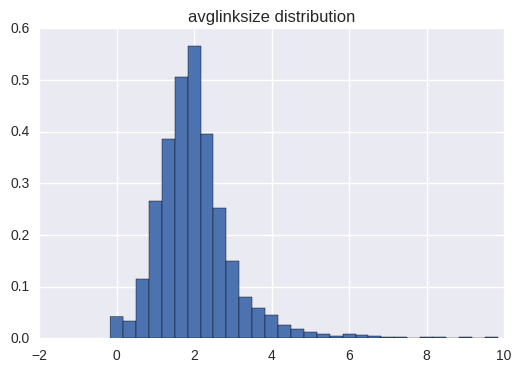

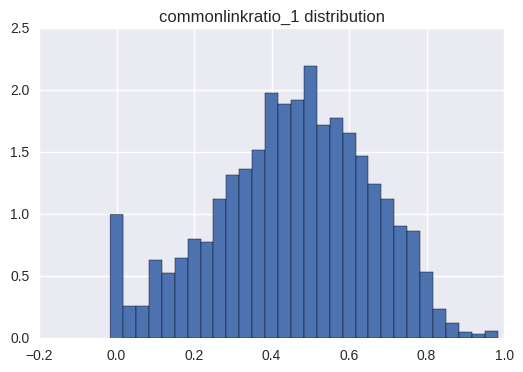

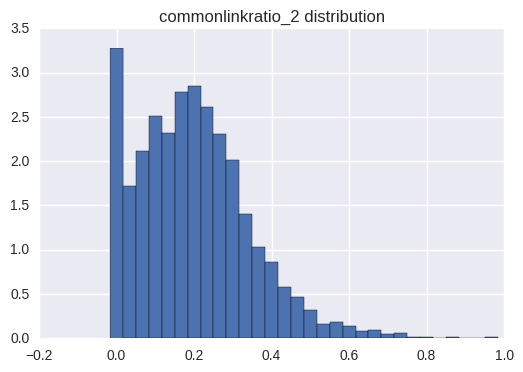

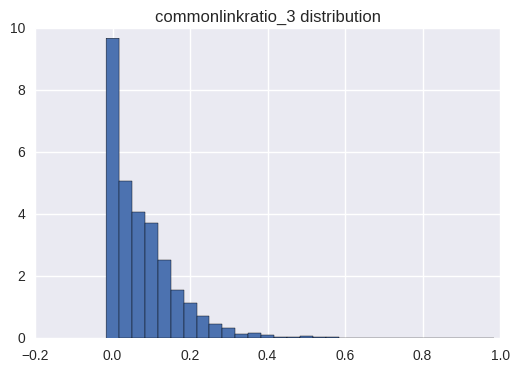

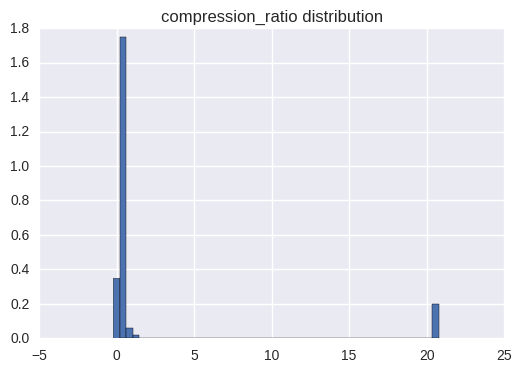

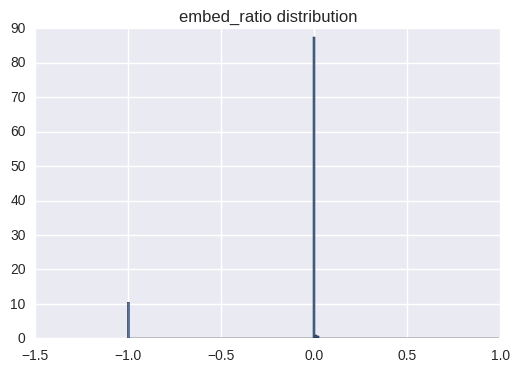

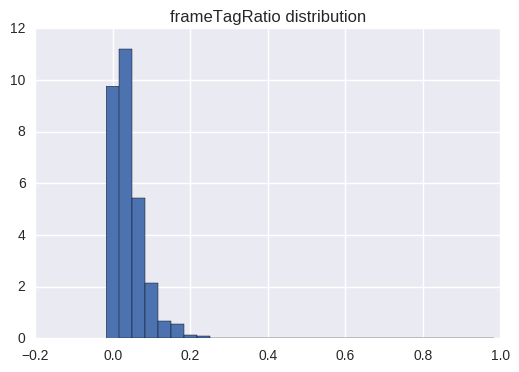

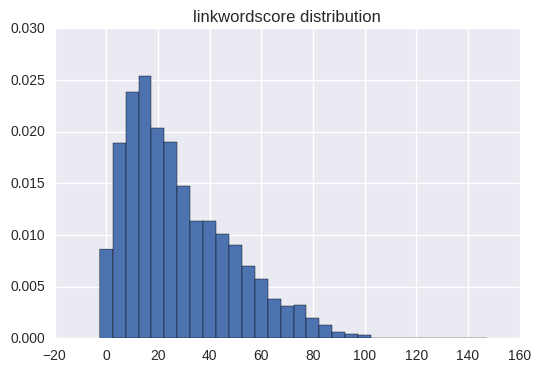

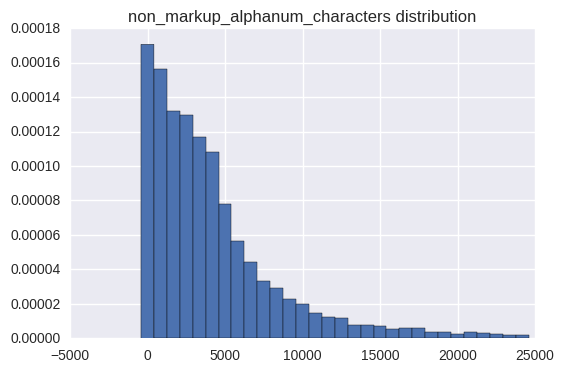

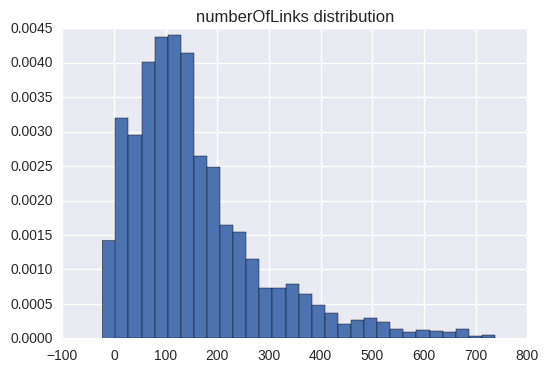

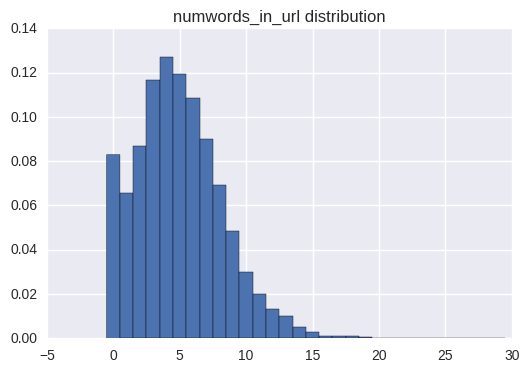

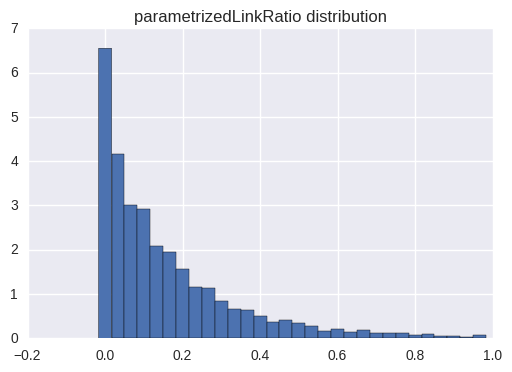

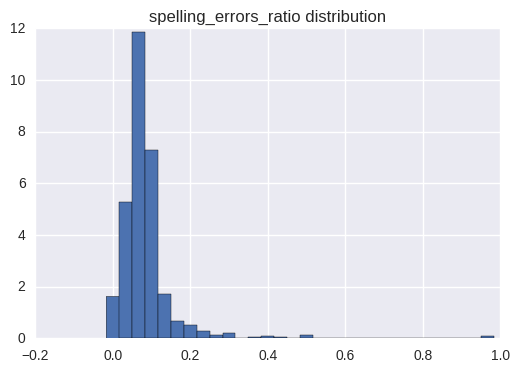

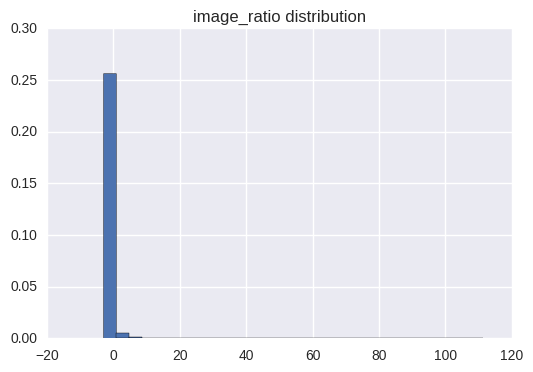

In [344]:
plt.hist(train_data['avglinksize'], normed=True, bins = 30, range=(0,10), align = 'left')
plt.title('avglinksize distribution')
plt.show()

plt.hist(train_data['commonlinkratio_1'], normed=True, bins = 30, range=(0,1), align = 'left')
plt.title('commonlinkratio_1 distribution')
plt.show()

plt.hist(train_data['commonlinkratio_2'], normed=True, bins = 30, range=(0,1), align = 'left')
plt.title('commonlinkratio_2 distribution')
plt.show()

plt.hist(train_data['commonlinkratio_3'], normed=True, bins = 30, range=(0,1), align = 'left')
plt.title('commonlinkratio_3 distribution')
plt.show()

plt.hist(train_data['compression_ratio'], normed=True, bins = 50, align = 'left')
plt.title('compression_ratio distribution')
plt.show()

plt.hist(train_data['embed_ratio'], normed=True, bins = 200, range=(-1,1), align = 'left')
plt.title('embed_ratio distribution')
plt.show()

plt.hist(train_data['frameTagRatio'], normed=True, bins = 30, range=(0,1), align = 'left')
plt.title('frameTagRatio distribution')
plt.show()

plt.hist(train_data['linkwordscore'], normed=True, bins = 30, range=(0,150), align = 'left')
plt.title('linkwordscore distribution')
plt.show()

plt.hist(train_data['non_markup_alphanum_characters'], normed=True, bins = 30, range=(-10,25000), align = 'left')
plt.title('non_markup_alphanum_characters distribution')
plt.show()

plt.hist(train_data['numberOfLinks'], normed=True, bins = 30, range=(-10,750), align = 'left')
plt.title('numberOfLinks distribution')
plt.show()

plt.hist(train_data['numwords_in_url'], normed=True, bins = 30, range=(0,30), align = 'left')
plt.title('numwords_in_url distribution')
plt.show()

plt.hist(train_data['parametrizedLinkRatio'], normed=True, bins = 30, range=(0,1), align = 'left')
plt.title('parametrizedLinkRatio distribution')
plt.show()

plt.hist(train_data['spelling_errors_ratio'], normed=True, bins = 30, range=(0,1), align = 'left')
plt.title('spelling_errors_ratio distribution')
plt.show()

plt.hist(train_data['image_ratio'], normed=True, bins = 30, align = 'left')
plt.title('image_ratio distribution')
plt.show()

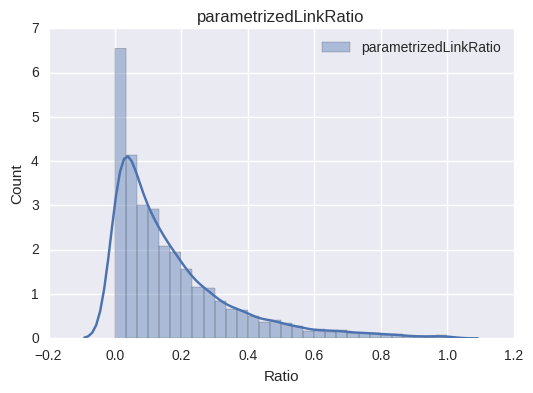

In [228]:
sns.distplot(train_data.parametrizedLinkRatio, bins = 30, kde = True, label='parametrizedLinkRatio')
plt.title('parametrizedLinkRatio')
plt.xlabel('Ratio')
plt.ylabel('Count')
plt.legend(loc="upper right")

### Categorical feature bars

In [212]:
for variable in categorical_variables:
  print ("-------------------------------")
  print ("Histogram for " + variable)
  print ("-------------------------------")
  print (train_data[variable].value_counts())
  print ("")

-------------------------------
Histogram for alchemy_category
-------------------------------
unknown               2348
recreation            1229
arts_entertainment     941
business               880
health                 506
sports                 380
culture_politics       343
computer_internet      296
science_technology     289
gaming                  76
religion                72
law_crime               31
weather                  4
Name: alchemy_category, dtype: int64



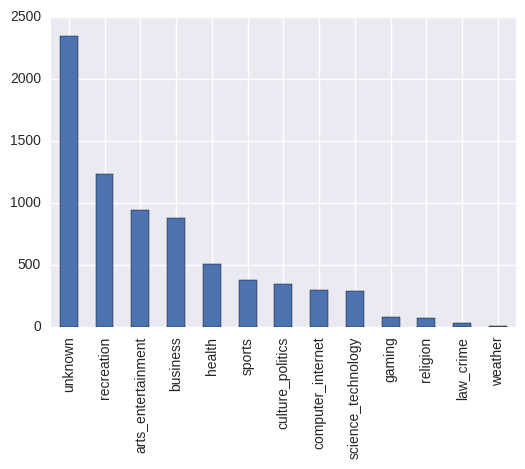

In [207]:
train_data.alchemy_category.value_counts().plot(kind='bar')

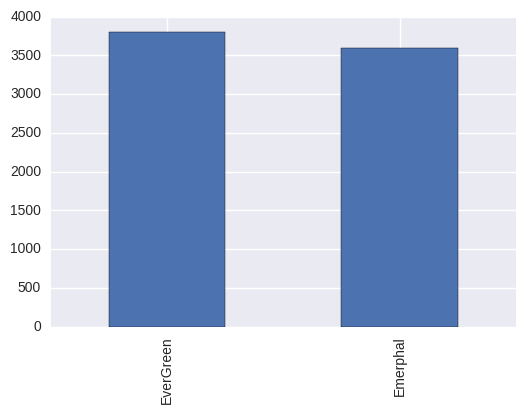

In [9]:
train_data['label_name'] = train_data['label'].map({0:'Emerphal', 1:'EverGreen'})
train_data.label_name.value_counts().plot(kind='bar')

# cleaning

### Remove Outliers

In [407]:
ratios = ['commonlinkratio_1', 'commonlinkratio_2', 'commonlinkratio_3', 'commonlinkratio_4', 
          'compression_ratio', 'embed_ratio', 'frameTagRatio', 'parametrizedLinkRatio', 'spelling_errors_ratio',
          'image_ratio', 'html_ratio']

for r in ratios:
    less_than_zero = train_data[r].loc[train_data[r] < 0].count()
    greater_than_one =  train_data[r].loc[train_data[r] > 1].count()
#     less_than_minus_ten = train_data[r].loc[train_data[r] < -10].count()
#     greater_than_ten =  train_data[r].loc[train_data[r] > 10].count()
    if less_than_zero > 0:
        print(str(less_than_zero) + " valuses less than 0 in ratio: " + r)
    if greater_than_one > 0:
        print(str(greater_than_one) + " valuses greater than 1 in ratio: " + r)
#     if less_than_minus_ten > 0:
#         print(str(less_than_minus_ten) + " valuses less than -10 in ratio: " + r)
#     if greater_than_one > 0:
#         print(str(greater_than_ten) + " valuses greater than 10 in ratio: " + r)

775 valuses greater than 1 in ratio: compression_ratio
774 valuses less than 0 in ratio: embed_ratio
690 valuses less than 0 in ratio: image_ratio
452 valuses greater than 1 in ratio: image_ratio


In [350]:
train_data[ratios].corr()

,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,compression_ratio,embed_ratio,frameTagRatio,parametrizedLinkRatio,spelling_errors_ratio,image_ratio,html_ratio
commonlinkratio_1,1.000000,0.808047,0.560584,0.388801,-0.017878,0.005280,-0.294860,-0.078026,-0.035019,-0.064435,-0.201501
commonlinkratio_2,0.808047,1.000000,0.758330,0.555148,-0.032460,0.019387,-0.259222,-0.079485,-0.027888,-0.044663,-0.159702
commonlinkratio_3,0.560584,0.758330,1.000000,0.850604,-0.016188,0.007578,-0.218559,-0.008652,-0.008599,-0.050357,-0.133370
commonlinkratio_4,0.388801,0.555148,0.850604,1.000000,-0.020415,0.005473,-0.178064,0.036387,-0.013507,-0.038071,-0.136561
compression_ratio,-0.017878,-0.032460,-0.016188,-0.020415,1.000000,-0.889345,0.159335,-0.033772,0.364122,-0.188976,0.106335
embed_ratio,0.005280,0.019387,0.007578,0.005473,-0.889345,1.000000,-0.130753,0.037361,-0.342206,0.183808,-0.090938
frameTagRatio,-0.294860,-0.259222,-0.218559,-0.178064,0.159335,-0.130753,1.000000,-0.094557,0.033663,-0.088847,0.384937
parametrizedLinkRatio,-0.078026,-0.079485,-0.008652,0.036387,-0.033772,0.037361,-0.094557,1.000000,-0.007397,0.118549,-0.183350
spelling_errors_ratio,-0.035019,-0.027888,-0.008599,-0.013507,0.364122,-0.342206,0.033663,-0.007397,1.000000,-0.010975,0.013860
image_ratio,-0.064435,-0.044663,-0.050357,-0.038071,-0.188976,0.183808,-0.088847,0.118549,-0.010975,1.000000,-0.172924


In [352]:
train_data[['embed_ratio','compression_ratio','image_ratio']].describe()

,embed_ratio,compression_ratio,image_ratio
count,7395.000000,7395.000000,7395.000000
mean,-0.103750,2.255103,0.275709
std,0.306545,5.704313,1.919320
min,-1.000000,0.000000,-1.000000
25%,0.000000,0.442616,0.025900
50%,0.000000,0.483680,0.083051
75%,0.000000,0.578227,0.236700
max,0.250000,21.000000,113.333333


In [289]:
# filltered_train_data = train_data.copy()
# filltered_train_data = filltered_train_data[filltered_train_data.compression_ratio > 1]
# filltered_train_data = train_data[np.abs(train_data.avglinksize-train_data.avglinksize.mean())<=(2*train_data.avglinksize.std())] #keep only the ones that are within +3 to -3 std.
# filltered_train_data = filltered_train_data[np.abs(train_data.compression_ratio-train_data.compression_ratio.mean())<=(3*train_data.compression_ratio.std())] #keep only the ones that are within +3 to -3 standard deviations in the column 'Data'.
# # filltered_train_data = filltered_train_data[np.abs(train_data.compression_ratio-train_data.compression_ratio.mean())<=(3*train_data.compression_ratio.std())] #keep only the ones that are within +3 to -3 standard deviations in the column 'Data'.

#  Data Normalization

In [374]:
cols_to_norm = ['embed_ratio','linkwordscore','avglinksize', 'non_markup_alphanum_characters', 'numberOfLinks', 'numwords_in_url']
normalized_train_data = train_data.copy()
normalized_train_data['embed_ratio'] = normalized_train_data['embed_ratio'].apply(lambda x: (x+1))
normalized_train_data[cols_to_norm] = normalized_train_data[cols_to_norm].apply(lambda x: x / (x.max() - x.min()))

### Drop Unnecessary Column

In [383]:
# normalized_train_data = normalized_train_data.drop('compression_ratio', axis = 1)
# normalized_train_data = normalized_train_data.drop('embed_ratio', axis = 1)
# normalized_train_data = normalized_train_data.drop('image_ratio', axis = 1)

# normalized_train_data = normalized_train_data.join(df_alchemy_category) #don't run more than 1 time!
# normalized_train_data = normalized_train_data.drop('alchemy_category', axis = 1)
normalized_train_data = normalized_train_data.drop(['url', 'boilerplate', 'urlid'], axis = 1)

In [384]:
normalized_train_data.iloc[:,:16].head(10)

,alchemy_category_score,avglinksize,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,framebased,frameTagRatio,hasDomainLink,html_ratio,is_news,lengthyLinkDomain,linkwordscore,news_front_page,non_markup_alphanum_characters,numberOfLinks
0,0.789131,0.005663,0.676471,0.205882,0.047059,0.023529,0,0.090774,0,0.245831,1.0,1,0.24,0.000000,0.026083,0.034027
1,0.574147,0.010132,0.508021,0.288770,0.213904,0.144385,0,0.098707,0,0.203490,1.0,1,0.40,0.000000,0.023914,0.037430
2,0.996526,0.006564,0.562016,0.321705,0.120155,0.042636,0,0.072448,0,0.226402,1.0,1,0.55,0.000000,0.010772,0.051641
3,0.801248,0.004251,0.400000,0.100000,0.016667,0.000000,0,0.095861,0,0.265656,1.0,0,0.24,0.000000,0.013162,0.024019
4,0.719157,0.007373,0.500000,0.222222,0.123457,0.043210,0,0.024908,0,0.228887,1.0,1,0.14,0.000000,0.057860,0.032426
5,0.603334,0.327824,0.745455,0.581818,0.290909,0.018182,0,0.019841,0,0.298300,1.0,0,0.12,0.047828,0.021005,0.011009
6,0.221110,0.002132,0.215054,0.053763,0.043011,0.043011,0,0.039568,0,0.218978,1.0,0,0.21,0.000000,0.006189,0.018615
7,0.603334,0.005188,0.719697,0.265152,0.113636,0.015152,0,0.026616,0,0.173746,1.0,0,0.05,0.047828,0.132992,0.026421
8,0.603334,0.001299,0.190722,0.036082,0.000000,0.000000,0,0.021705,0,0.114962,1.0,0,0.17,0.000000,0.011883,0.038831
9,0.603334,0.006639,0.469325,0.101227,0.018405,0.003067,0,0.012000,0,0.205117,1.0,1,0.14,0.047828,0.055104,0.065252


## Randomly Shuffle Training Data

In [385]:
train_data = normalized_train_data.sample(frac = 1)

In [395]:
data = train_data.drop('label', 1)

data.iloc[:,10].name

'is_news'

# Feature Selection

Feature ranking:
1. feature 12 (alchemy_category_score)
   score: 0.080172
2. feature 7 (avglinksize)
   score: 0.071785
3. feature 14 (commonlinkratio_1)
   score: 0.067292
4. feature 18 (commonlinkratio_2)
   score: 0.062918
5. feature 15 (commonlinkratio_3)
   score: 0.060487
6. feature 9 (commonlinkratio_4)
   score: 0.060336
7. feature 1 (framebased)
   score: 0.060221
8. feature 2 (frameTagRatio)
   score: 0.059393
9. feature 17 (hasDomainLink)
   score: 0.058733
10. feature 16 (html_ratio)
   score: 0.057598
11. feature 3 (is_news)
   score: 0.057447
12. feature 4 (lengthyLinkDomain)
   score: 0.055070
13. feature 5 (linkwordscore)
   score: 0.050185
14. feature 0 (news_front_page)
   score: 0.043469
15. feature 13 (non_markup_alphanum_characters)
   score: 0.021626
16. feature 26 (numberOfLinks)
   score: 0.021612
17. feature 20 (numwords_in_url)
   score: 0.020102
18. feature 29 (parametrizedLinkRatio)
   score: 0.017115
19. feature 11 (spelling_errors_ratio)
   score: 0.01648

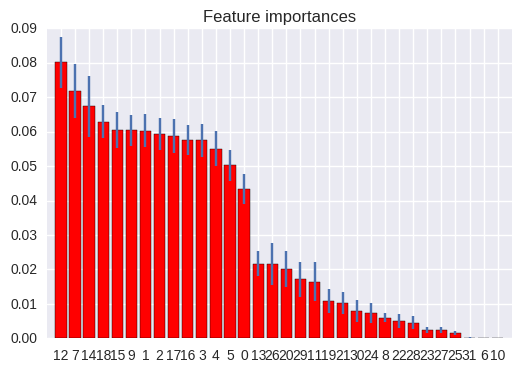

In [399]:
# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)
labels = train_data['label'].values
data = train_data.drop('label', 1)
data_to_fit = train_data.drop('label', 1).values

forest.fit(data_to_fit, labels)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(data.shape[1]):
    print("%d. feature %d (%s)\n   score: %f" % (f + 1, indices[f], data.iloc[:,f].name, importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(data_to_fit.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(data_to_fit.shape[1]), indices)
plt.xlim([-1, data_to_fit.shape[1]])
plt.show()

# TF - IDF

In [ ]:
print "loading data.."
traindata = list(np.array(p.read_table('train.tsv'))[:, 2])
testdata = list(np.array(p.read_table('test.tsv'))[:, 2])
y = np.array(np.array(p.read_table('train.tsv'))[:, -1]).astype(int)


tfv = TfidfVectorizer(min_df=3, max_features=None, strip_accents='unicode',
                      analyzer='word', token_pattern=r'\w{1,}', ngram_range=(1, 2), use_idf=1, smooth_idf=1,
                      sublinear_tf=1)

rd = lm.LogisticRegression(penalty='l2', dual=True, tol=0.0001,
                           C=1, fit_intercept=True, intercept_scaling=1.0,
                           class_weight=None, random_state=None)

x_all = traindata + testdata
len_train = len(traindata)

print "fitting pipeline"
x2 = tfv.fit_transform((np.array(x_all)))  # returns a matrix of [n_samples, n_features]

print "transforming data"
x_train = x2[:len_train]
x_test = x2[len_train:]

print "20 Fold CV Score: ", np.mean(cross_validation.cross_val_score(rd, x_train, y, cv=20, scoring='roc_auc'))

print "training on full data"
rd.fit(x_train, y)
prediction = rd.predict_proba(x_test)[:, 1]
testfile = p.read_csv('test.tsv', sep="\t", na_values=['?'], index_col=1)
prediction_df = p.DataFrame(prediction, index=testfile.index, columns=['label'])
prediction_df.to_csv('benchmark.csv')
print "submission file created.."

## Visualization

In [29]:
print(train_data[train_data['class'] == '0'])

        age         workclass     education education-num      marital-status  \
27952  21.0           Private       HS-grad             9       Never-married   
18886  54.0           Private       HS-grad             9  Married-civ-spouse   
11885  40.0           Private    Assoc-acdm            12       Never-married   
25927  25.0           Private     Bachelors            13       Never-married   
4963   47.0           Private       Masters            14       Never-married   
985    63.0           Private     Assoc-voc            11            Divorced   
26040  29.0           Private       HS-grad             9       Never-married   
25458  26.0           Private    Assoc-acdm            12  Married-civ-spouse   
26029  52.0  Self-emp-not-inc     Assoc-voc            11  Married-civ-spouse   
27345  50.0           Private     Bachelors            13  Married-civ-spouse   
8248   23.0           Private     Bachelors            13  Married-civ-spouse   
6799   35.0         State-go

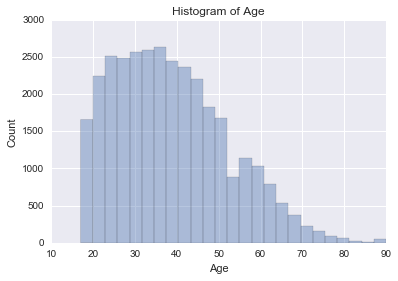

In [30]:
sns.distplot(train_data.age, bins = 25, kde = False)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Count')
#plt.show()

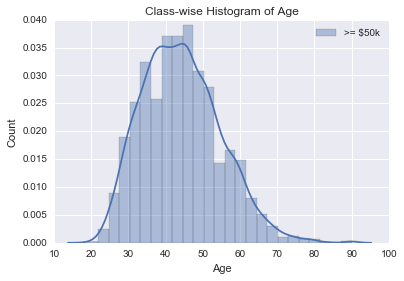

In [31]:
sns.distplot(train_data[train_data['class'] == '1'].age, bins = 25, kde = True, label = ">= $50k")
plt.title('Class-wise Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(loc="upper right")

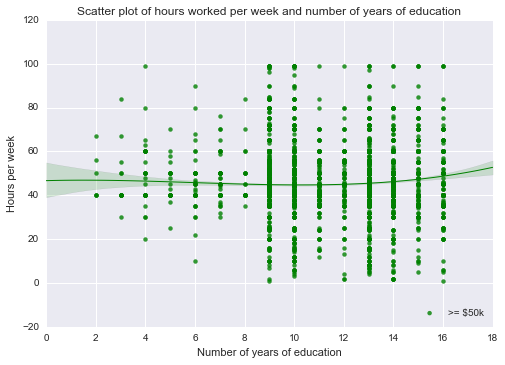

In [32]:
sns.set(color_codes=True)
train_data['education-num'] = train_data['education-num'].map(int)
sns.regplot('education-num', 'hours-per-week', train_data[train_data['class'] == '1'], 
            scatter_kws={"marker": ".", "color": "green"},
            line_kws = {"linewidth": "1", "color": "green"},
            order = 3,
            label = '>= $50k')
plt.xlabel('Number of years of education')
plt.ylabel('Hours per week')
plt.legend(loc="lower right")
plt.title("Scatter plot of hours worked per week and number of years of education")

## Binning numeric values

In [33]:
def binning(col,bin_num):
  #Define min and max values:
  minval = col.min()
  maxval = col.max()

  

  #if no labels provided, use default labels 0 ... (n-1)
  
  labels = ['BIN_'+str(i) for i in range(bin_num)]

  #Binning using cut function of pandas
  #colBin = pd.cut(col,bin_num,include_lowest=True)
  colBin = pd.cut(col,bin_num,labels=labels,include_lowest=True)
  return colBin

In [34]:
age=train_data['age'].head(5)
age_b=binning(train_data['age'],20).head(5)
for i in enumerate(zip(age,age_b)):
    print(i[1])

(21.0, 'BIN_1')
(59.0, 'BIN_11')
(54.0, 'BIN_10')
(40.0, 'BIN_6')
(25.0, 'BIN_2')


In [35]:
#bin all numeric variables:
categorical_variables = ['workclass', 'education', 'education-num', 'marital-status', 
                         'occupation', 'relationship', 'race', 'sex', 'native-country']
numeric_variables = ['hours-per-week','age','capital-gain','capital-loss']


numeric_variables_binned = []
for variable in numeric_variables:
    binned_output_column = variable + "_binned"
    train_data[binned_output_column] = binning(train_data[variable],20)
    test_data[binned_output_column] = binning(test_data[variable],20)
    numeric_variables_binned.append(binned_output_column)

In [36]:
train_data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class,hours-per-week_binned,age_binned,capital-gain_binned,capital-loss_binned
27952,21.0,Private,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0.0,0.0,32.0,United-States,0,BIN_6,BIN_1,BIN_0,BIN_0
15390,59.0,Private,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0.0,0.0,40.0,United-States,1,BIN_7,BIN_11,BIN_0,BIN_0
18886,54.0,Private,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0.0,0.0,44.0,United-States,0,BIN_8,BIN_10,BIN_0,BIN_0
11885,40.0,Private,Assoc-acdm,12,Never-married,Adm-clerical,Not-in-family,White,Female,0.0,0.0,40.0,United-States,0,BIN_7,BIN_6,BIN_0,BIN_0
25927,25.0,Private,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Female,0.0,0.0,40.0,United-States,0,BIN_7,BIN_2,BIN_0,BIN_0


## One Hot encoding:

In [37]:
pd.get_dummies(train_data['relationship'],prefix='relationship').head(10)

,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife
27952,0.0,0.0,0.0,1.0,0.0,0.0
15390,1.0,0.0,0.0,0.0,0.0,0.0
18886,1.0,0.0,0.0,0.0,0.0,0.0
11885,0.0,1.0,0.0,0.0,0.0,0.0
25927,0.0,1.0,0.0,0.0,0.0,0.0
5431,0.0,0.0,0.0,0.0,0.0,1.0
4963,0.0,1.0,0.0,0.0,0.0,0.0
985,0.0,1.0,0.0,0.0,0.0,0.0
26040,0.0,1.0,0.0,0.0,0.0,0.0
1463,1.0,0.0,0.0,0.0,0.0,0.0


In [38]:
#Encode all binned numeric columns and categorical columns with oneHot
oh_train = train_data['class']
oh_test = test_data['class']

for variable in numeric_variables_binned+categorical_variables:
    onehot_train_col = pd.get_dummies(train_data[variable],prefix=variable)
    oh_train = pd.concat([oh_train,onehot_train_col],axis=1)
    
    onehot_test_col = pd.get_dummies(test_data[variable],prefix=variable)
    oh_test = pd.concat([oh_test,onehot_test_col],axis=1)

In [61]:
#check for missing values:
missing=[]
for i in oh_train.keys():
    if i not in oh_test.keys():
        missing.append(i)
for i in missing:
    oh_test[i]=0.0

## Build the model: Logistic regression

In [62]:
from sklearn import linear_model
logreg = linear_model.LogisticRegression(C=1e5)

#separate labels from data
train_class = oh_train['class']
oh_train_data= oh_train.drop('class',axis=1)

In [63]:
logreg.fit(oh_train_data, train_class)
print(logreg)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)


## Evaluate results

In [90]:
from sklearn import metrics

test_class = oh_test['class']


expected = test_class.values
oh_test_data= oh_test.drop('class',axis=1)
predicted = logreg.predict(oh_test_data)
predicted_probs = logreg.predict_proba(oh_test_data)

In [103]:
print(metrics.classification_report(expected, predicted))

             precision    recall  f1-score   support

          0       0.81      0.97      0.89     12435
          1       0.76      0.28      0.41      3846

avg / total       0.80      0.81      0.77     16281

[ 0.00229664  0.23970629  0.08784965 ...,  0.25690392  0.16952656
  0.30020259]


## Cross-validation

In [85]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(logreg, oh_test_data, test_class, cv=5)

In [86]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.86 (+/- 0.01)


## Understanding Model Performance

In [68]:
import sklearn.metrics
 
def plotRoc(fpr, tpr, auc):
  plt.figure()
  plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
  plt.plot([0, 1], [0, 1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver operating characteristic example')
  plt.legend(loc="lower right")
  plt.show()
    
def plotPR(precision, recall):
  plt.figure()
  plt.plot(recall, precision, label='PR curve')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])
  plt.xlabel('Recall')
  plt.ylabel('Precision')
  plt.title('Precision Recall curve')
  plt.legend(loc='lower left')
  plt.show()
 
def plotMetrics(expected,predicted):
  y_true = expected
  y_score = predicted
  #y_score = df['rawPrediction'].map(lambda x: x['values'][1])
  auc = sklearn.metrics.roc_auc_score(y_true, y_score)
  fpr, tpr, thresholds = sklearn.metrics.roc_curve(y_true, y_score)
  plotRoc(fpr, tpr, auc)
  precision, recall, thresholds = sklearn.metrics.precision_recall_curve(y_true, y_score, pos_label=1)
  plotPR(precision, recall)

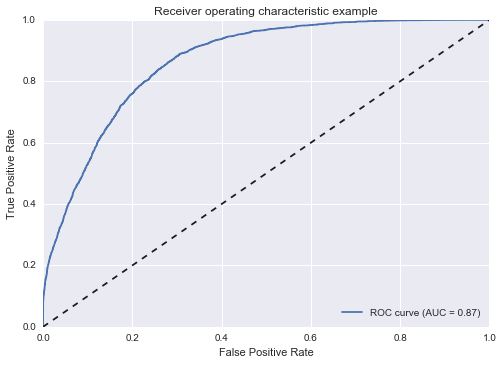

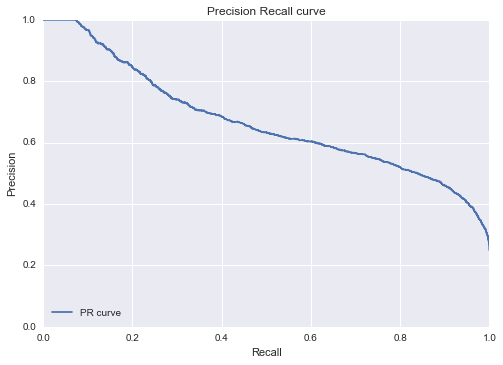

In [104]:
#plotMetrics(expected.astype('int'),predicted.astype('int'))
plotMetrics(expected.astype('int'),predicted_probs[:,1])